<a href="https://colab.research.google.com/github/gnikhilchand/Sales_data_Analysis/blob/main/fithack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Understanding & Identification of Issues

###Load the Data

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/sales_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and basic info
data_info = data.info()
data_head = data.head()

data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_head

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


##Check for Missing Data.

In [ ]:
# Check for missing data
missing_data = data.isnull().sum()

missing_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


##Explore Summary Statistics.

In [ ]:
# Summary statistics for numerical columns
summary_statistics = data.describe()

summary_statistics.T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


##Identify and Handle Outliers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


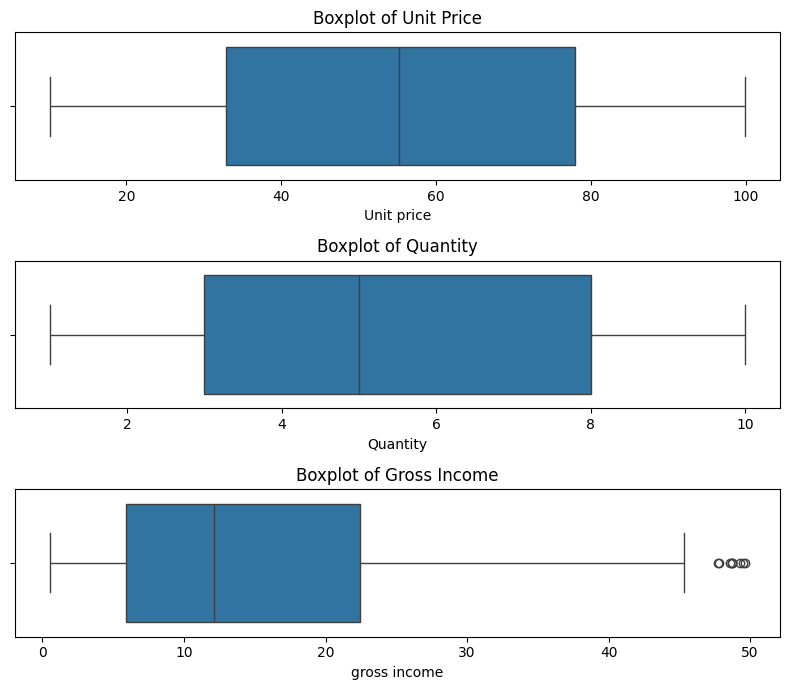

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier analysis using boxplots for key variables
fig, axs = plt.subplots(3, 1, figsize=(8, 7))

sns.boxplot(x=data['Unit price'], ax=axs[0])
axs[0].set_title('Boxplot of Unit Price')

sns.boxplot(x=data['Quantity'], ax=axs[1])
axs[1].set_title('Boxplot of Quantity')

sns.boxplot(x=data['gross income'], ax=axs[2])
axs[2].set_title('Boxplot of Gross Income')

plt.tight_layout()
plt.show()



##Correlation Analysis to identify relationships between variables.


In [ ]:
# Correlation analysis between numerical variables
correlation_matrix = data[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']].corr()
correlation_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


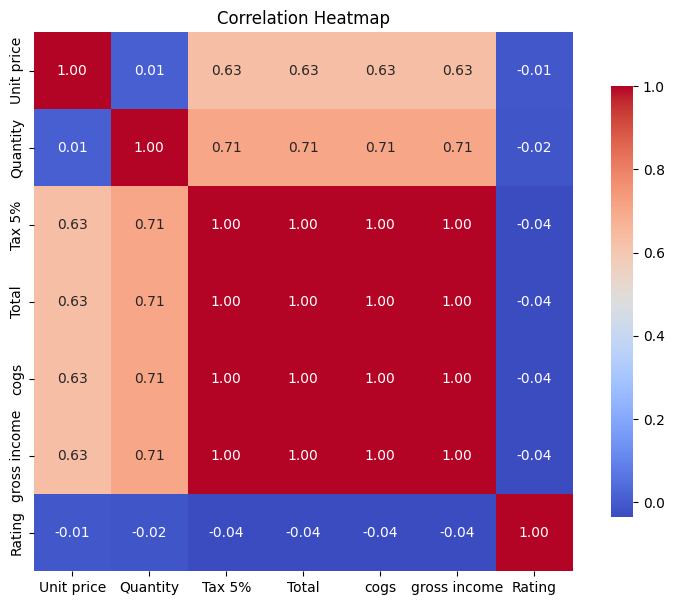

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

##Summary Statistics:
Unit Price: Ranges from 10.08 to 99.96, with a mean of 55.67.
Quantity: Varies from 1 to 10, with an average of about 5.5 items per transaction.
Gross Income: Ranges from 0.51 to 49.65, with an average of 15.38.
Rating: Customer ratings range from 4 to 10, with an average of about 7.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


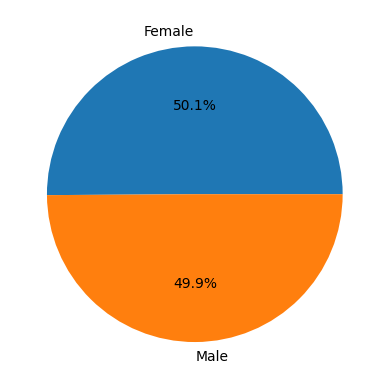

In [ ]:
gen = data['Gender'].value_counts()
gen
fig, ax = plt.subplots()
ax.pie(gen, labels=gen.index,autopct='%1.1f%%')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


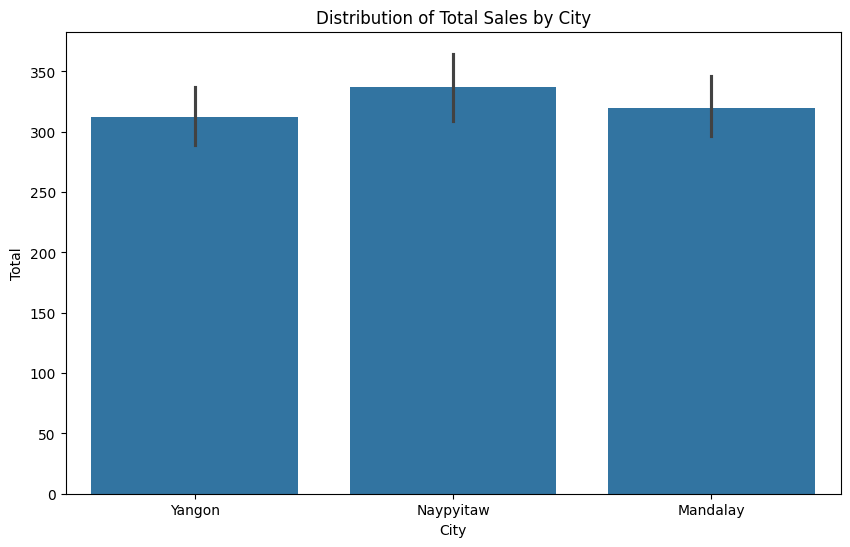

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Total', data=data)
plt.title('Distribution of Total Sales by City')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


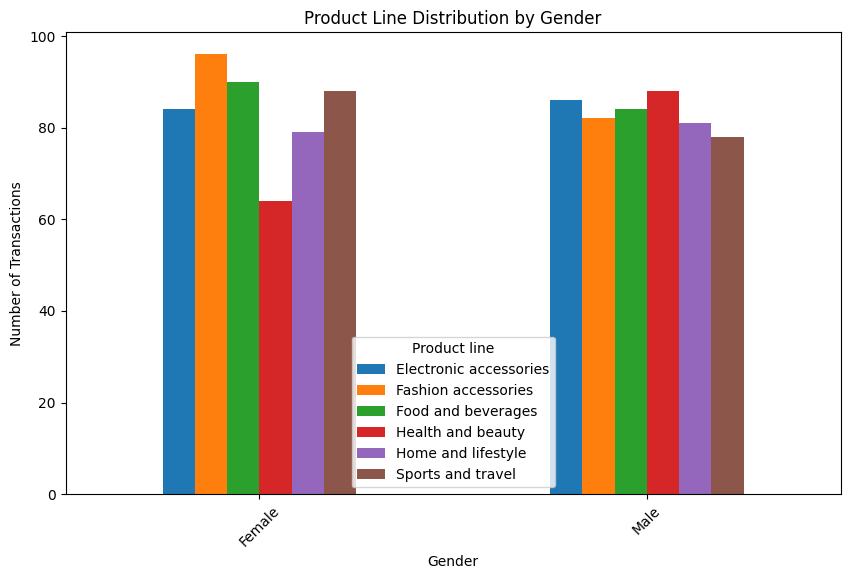

In [ ]:
product_line_by_gender = data.groupby(['Gender', 'Product line']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
product_line_by_gender.plot(kind='bar', ax=ax)

ax.set_title('Product Line Distribution by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Transactions')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# ax.grid(True)
# Mostrar la gráfica
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


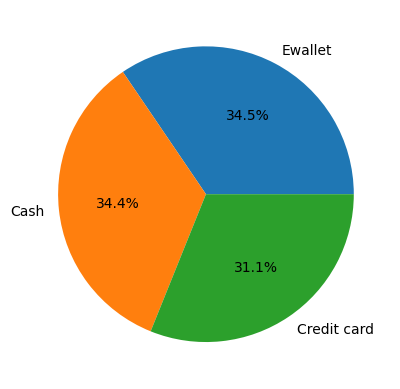

In [ ]:
payment = data['Payment'].value_counts()
payment
fig, ax = plt.subplots()
ax.pie(payment, labels=payment.index,autopct='%1.1f%%')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


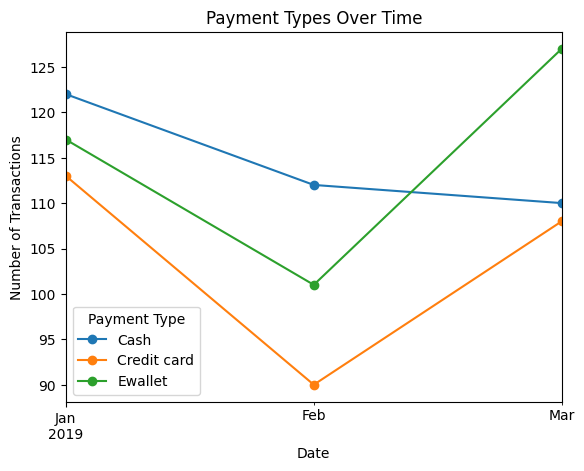

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
payment_type_over_time = data.groupby([data['Date'].dt.to_period('M'), 'Payment']).size().unstack(fill_value=0)
payment_type_over_time.plot(kind='line', marker='o')
plt.title('Payment Types Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend(title='Payment Type')
plt.grid(False)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


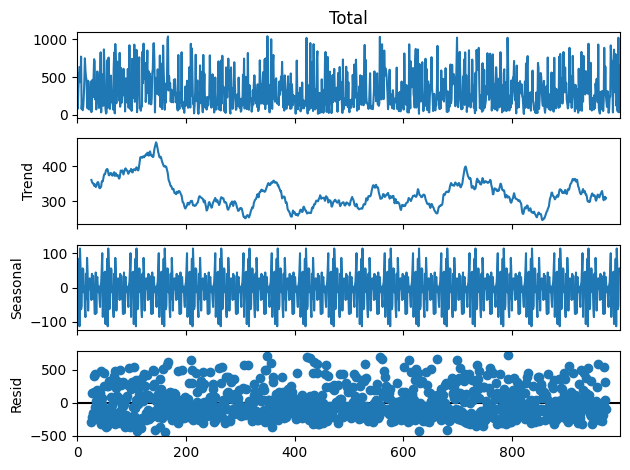

In [ ]:
#Seasonal decompose- Time series decompose
from statsmodels.tsa.seasonal import seasonal_decompose
result= seasonal_decompose(data['Total'], model= 'additive', period=52)

trend= result.trend
seasonal= result.seasonal
residual = result.resid
#plotting
result.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


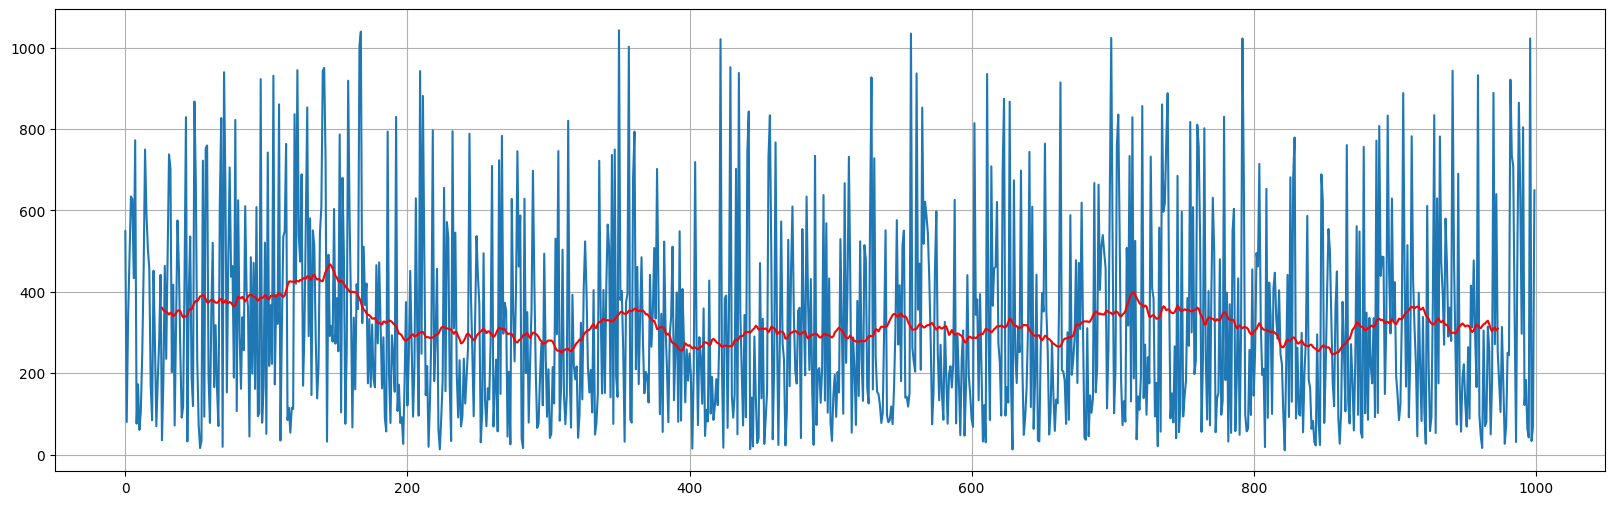

In [ ]:
#Actual Vs Seasonal
plt.figure(figsize=(20,6))
plt.plot(data['Total'],label='Actual Sales')
plt.plot(trend,label='Trend',color='red',)
plt.grid()
# plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


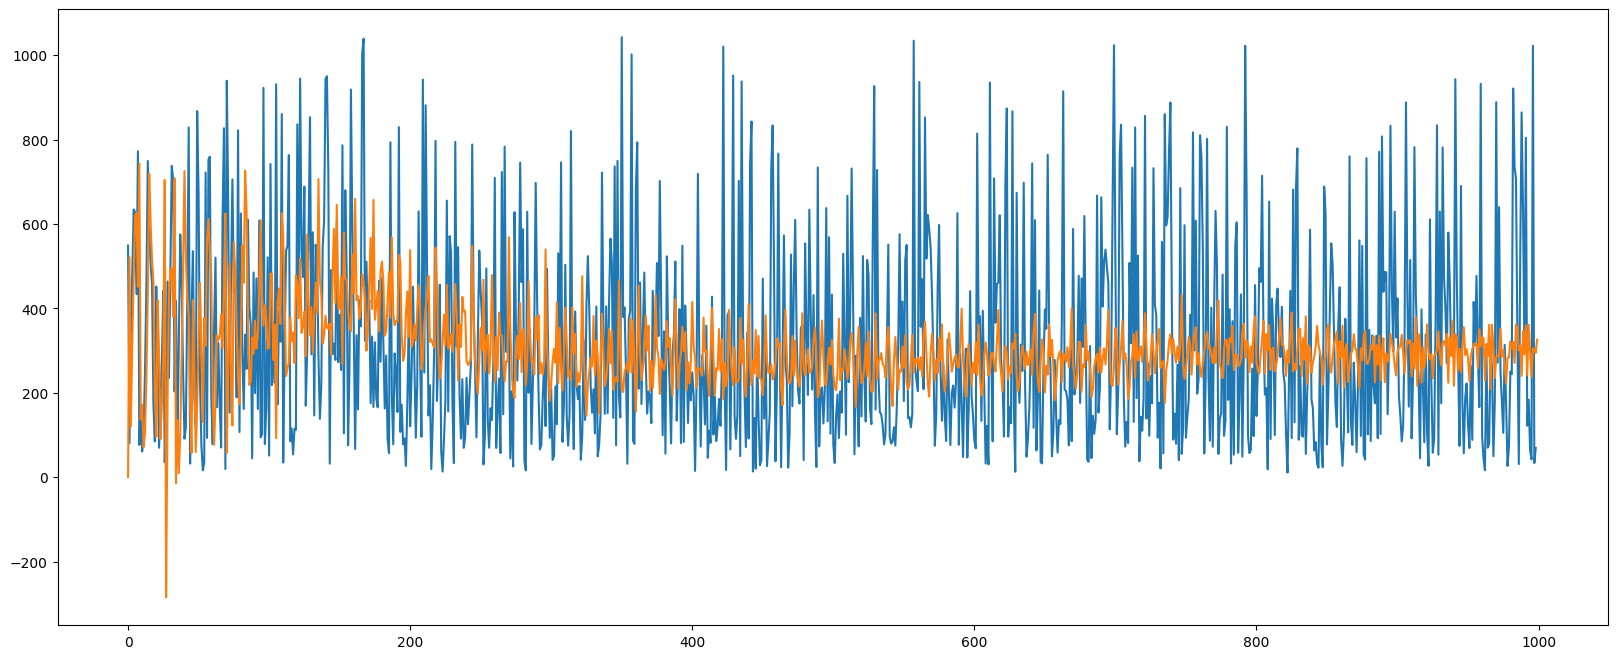

In [ ]:
#Predicting using SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_1= SARIMAX(data['Total'], order=(1,1,1), seasonal_order=(1,1,1,26))

pred_1=sarima_1.fit().predict()
pred_1.index=data.index
pred_1
#Comparison of actual vs predicted
plt.figure(figsize=(20,8))
plt.plot(data['Total'][:-1],label='Actual')
plt.plot(pred_1,label='Predicted')
plt.show()

##Product Line Analysis:

In [ ]:
# Grouping by Product Line
product_line_analysis = data.groupby('Product line').agg({
    'gross income': ['mean', 'sum'],
    'Quantity': 'sum',
    'Unit price': 'mean'
}).reset_index()

# Rename columns for clarity
product_line_analysis.columns = ['Product Line', 'Average Gross Income', 'Total Gross Income', 'Total Quantity Sold', 'Average Unit Price']

# Display the result
print(product_line_analysis)


             Product Line  Average Gross Income  Total Gross Income  \
0  Electronic accessories             15.220597           2587.5015   
1     Fashion accessories             14.528062           2585.9950   
2      Food and beverages             15.365310           2673.5640   
3       Health and beauty             15.411572           2342.5590   
4      Home and lifestyle             16.030331           2564.8530   
5       Sports and travel             15.812630           2624.8965   

   Total Quantity Sold  Average Unit Price  
0                  971           53.551588  
1                  902           57.153652  
2                  952           56.008851  
3                  854           54.854474  
4                  911           55.316937  
5                  920           56.993253  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Branch Analysis:

In [ ]:
# Grouping by Branch
branch_analysis = data.groupby('Branch').agg({
    'gross income': ['mean', 'sum'],
    'Quantity': 'sum',
    'Unit price': 'mean'
}).reset_index()

# Rename columns for clarity
branch_analysis.columns = ['Branch', 'Average Gross Income', 'Total Gross Income', 'Total Quantity Sold', 'Average Unit Price']

# Display the result
print(branch_analysis)

  Branch  Average Gross Income  Total Gross Income  Total Quantity Sold  \
0      A             14.874001           5057.1605                 1859   
1      B             15.232024           5057.0320                 1820   
2      C             16.052367           5265.1765                 1831   

   Average Unit Price  
0           54.780853  
1           55.659277  
2           56.609024  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Customer Type Analysis:

In [ ]:
# Grouping by Customer Type
customer_type_analysis = data.groupby('Customer type').agg({
    'gross income': ['mean', 'sum'],
    'Quantity': 'sum',
    'Unit price': 'mean'
}).reset_index()

# Rename columns for clarity
customer_type_analysis.columns = ['Customer Type', 'Average Gross Income', 'Total Gross Income', 'Total Quantity Sold', 'Average Unit Price']

# Display the result
print(customer_type_analysis)


  Customer Type  Average Gross Income  Total Gross Income  \
0        Member             15.609110            7820.164   
1        Normal             15.148707            7559.205   

   Total Quantity Sold  Average Unit Price  
0                 2785           56.206986  
1                 2725           55.135130  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Bar plot for Product Line analysis
sns.barplot(x='Customer type', y='Total Gross Income', data=branch_analysis)
plt.title('Total Gross Income by customer type')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: Could not interpret value `Customer type` for `x`. An entry with this name does not appear in `data`.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


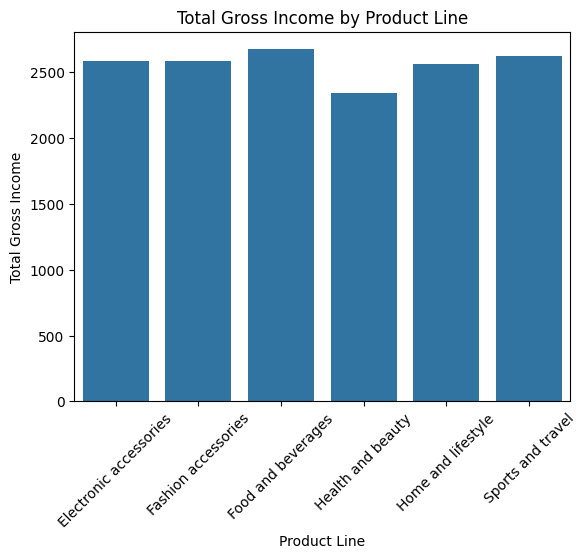

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Bar plot for Product Line analysis
sns.barplot(x='Product Line', y='Total Gross Income', data=product_line_analysis)
plt.title('Total Gross Income by Product Line')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-88-3a4e8d060fcd>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product line', y='Total', hue='Gender', data=data, ci=None)


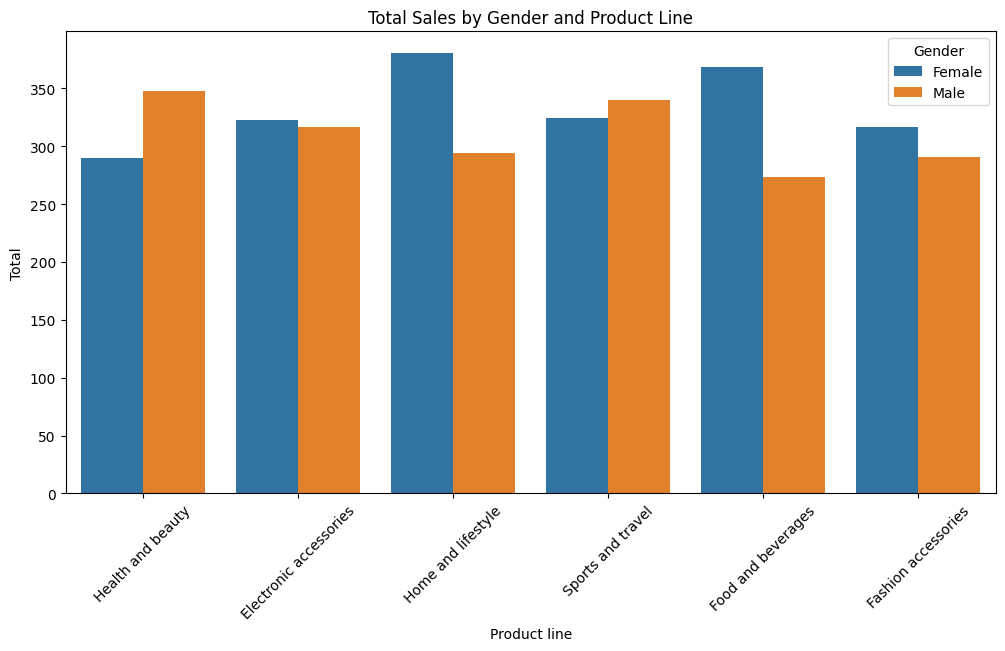

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Total', hue='Gender', data=data, ci=None)
plt.title('Total Sales by Gender and Product Line')
plt.xticks(rotation=45)
plt.show()


 ## Customer Segmentation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


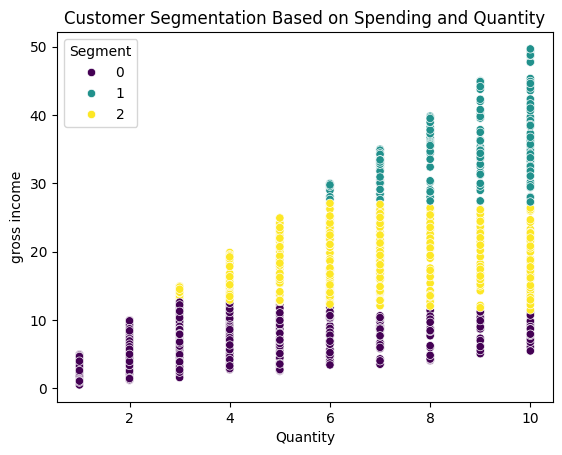

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Create a new feature for total spending per customer (Invoice ID)
customer_spending = data.groupby('Invoice ID').agg({
    'gross income': 'sum',
    'Quantity': 'sum',
    'Customer type': 'first'
}).reset_index()

# Apply K-Means Clustering to segment customers
X = customer_spending[['gross income', 'Quantity']]

# Choosing 3 clusters for simplicity
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
customer_spending['Segment'] = kmeans.labels_

# Visualize the segments
sns.scatterplot(x='Quantity', y='gross income', hue='Segment', data=customer_spending, palette='viridis')
plt.title('Customer Segmentation Based on Spending and Quantity')
plt.show()


##Time Series Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


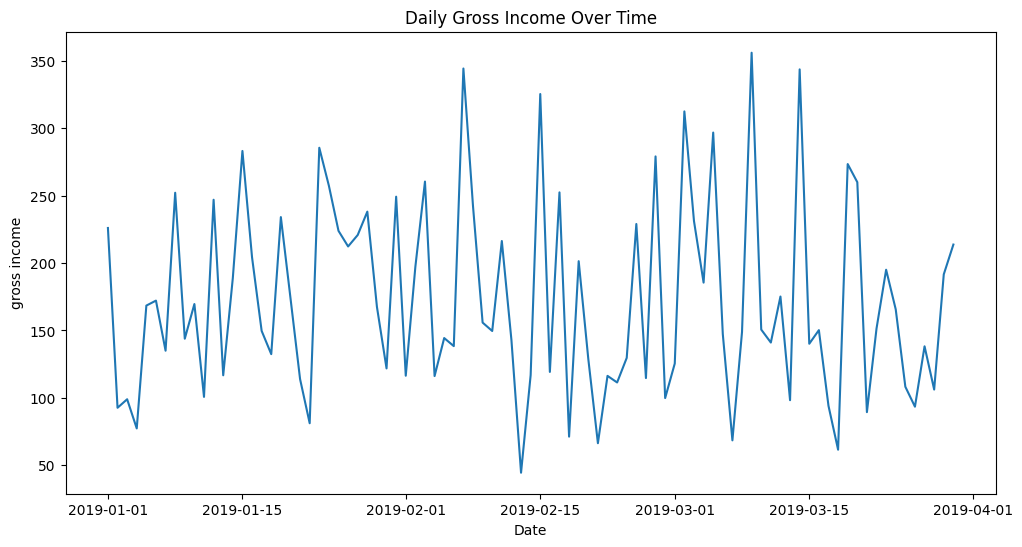

In [ ]:
# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Aggregate Gross Income by Date
daily_income = data.groupby('Date')['gross income'].sum().reset_index()

# Plotting the time series
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='gross income', data=daily_income)
plt.title('Daily Gross Income Over Time')
plt.show()


##Correlation and Feature Importance

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


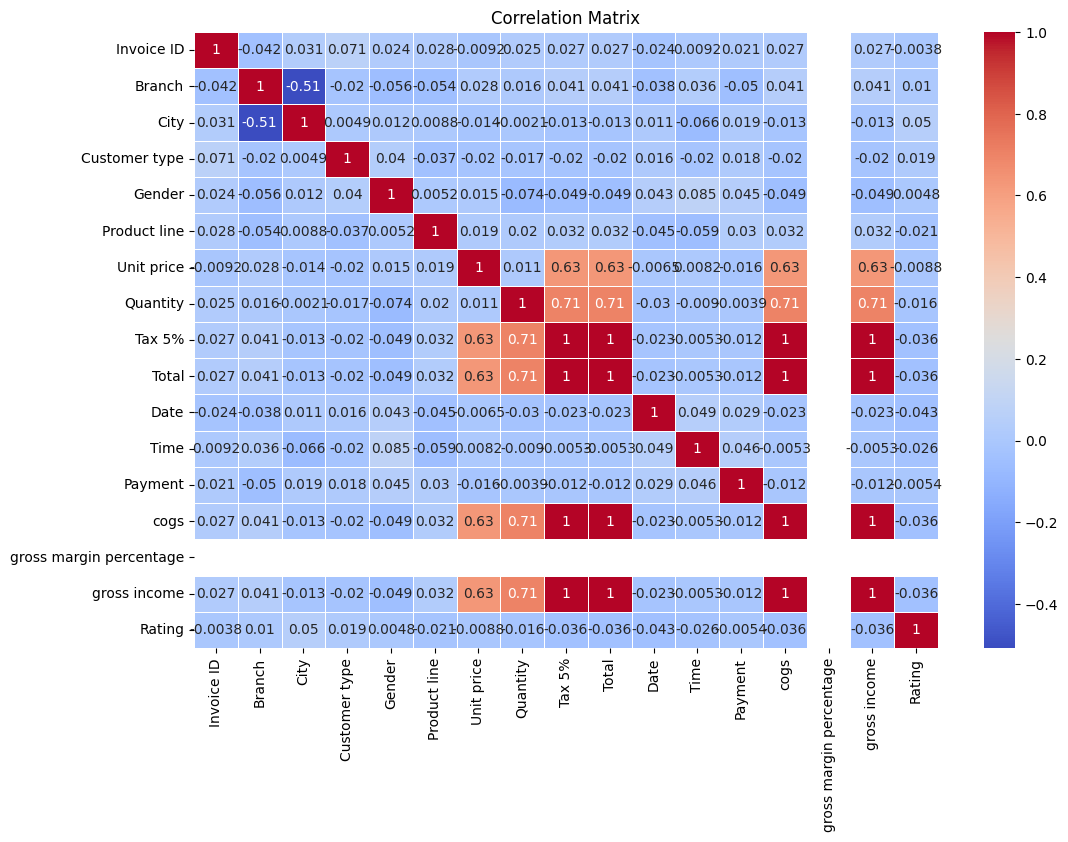

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numeric
data_encoded = data.copy()
label_encoders = {}
for column in data_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])
    label_encoders[column] = le

# Correlation matrix
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


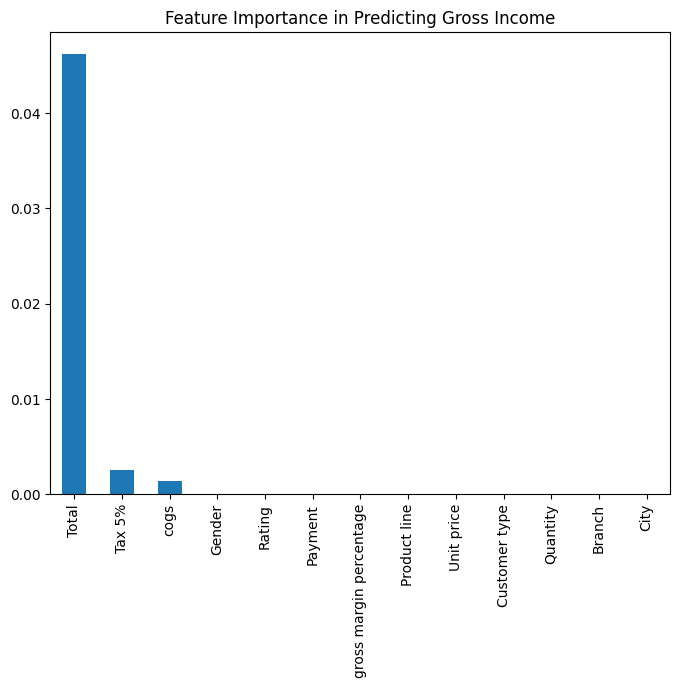

In [ ]:
# Feature Importance using Linear Regression
X = data_encoded.drop(columns=['gross income', 'Invoice ID', 'Date', 'Time'])
y = data_encoded['gross income']

model = LinearRegression()
model.fit(X, y)

# Display feature importance
feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(8, 6))
plt.title('Feature Importance in Predicting Gross Income')
plt.show()

##Customer Rating Analysis

In [ ]:
data['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

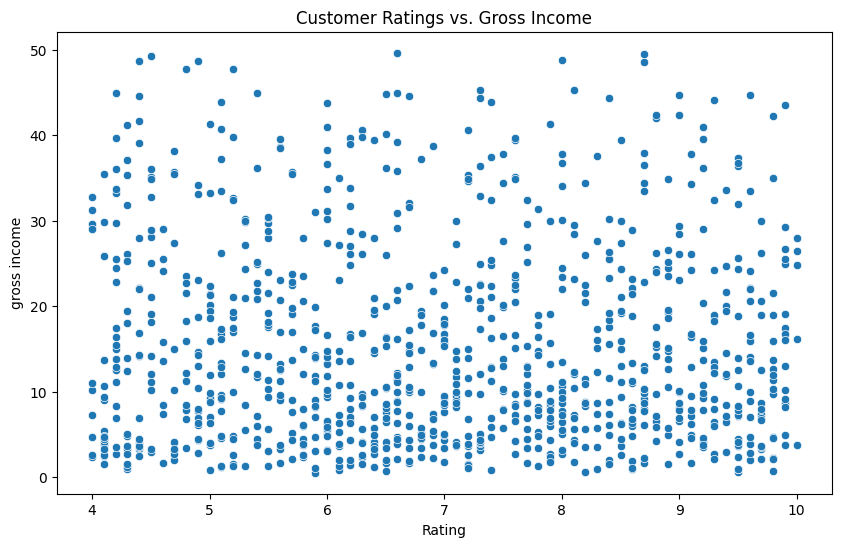

Correlation between Rating and Gross Income: -0.03644170499701839


In [ ]:
# Scatter plot to visualize the relationship between Rating and Gross Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='gross income', data=data)
plt.title('Customer Ratings vs. Gross Income')
plt.show()

# Calculate the correlation between Rating and Gross Income
rating_correlation = data['Rating'].corr(data['gross income'])
print(f"Correlation between Rating and Gross Income: {rating_correlation}")


##Predictive Modeling

Random Forest MAE: 0.04
Random Forest R2: 1.00
Gradient Boosting MAE: 0.07
Gradient Boosting R2: 1.00


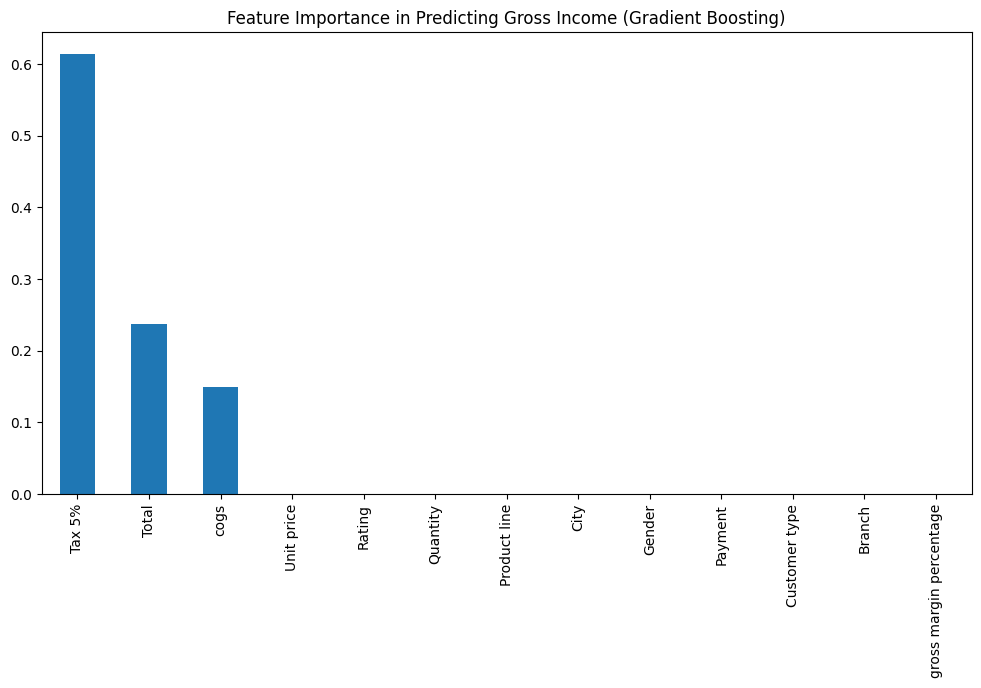

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Preparing the dataset
X = data_encoded.drop(columns=['gross income', 'Invoice ID', 'Date', 'Time'])
y = data_encoded['gross income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluation
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"Random Forest R2: {r2_score(y_test, y_pred_rf):.2f}")

print(f"Gradient Boosting MAE: {mean_absolute_error(y_test, y_pred_gb):.2f}")
print(f"Gradient Boosting R2: {r2_score(y_test, y_pred_gb):.2f}")

# Feature Importance from the Gradient Boosting Model
feature_importance_gb = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance_gb.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance in Predicting Gross Income (Gradient Boosting)')
plt.show()


##Customer Lifetime Value (CLTV) Prediction

<ipython-input-30-06a26b6f02d7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Invoice ID', y='CLTV', data=top_customers_cltv, palette='viridis')


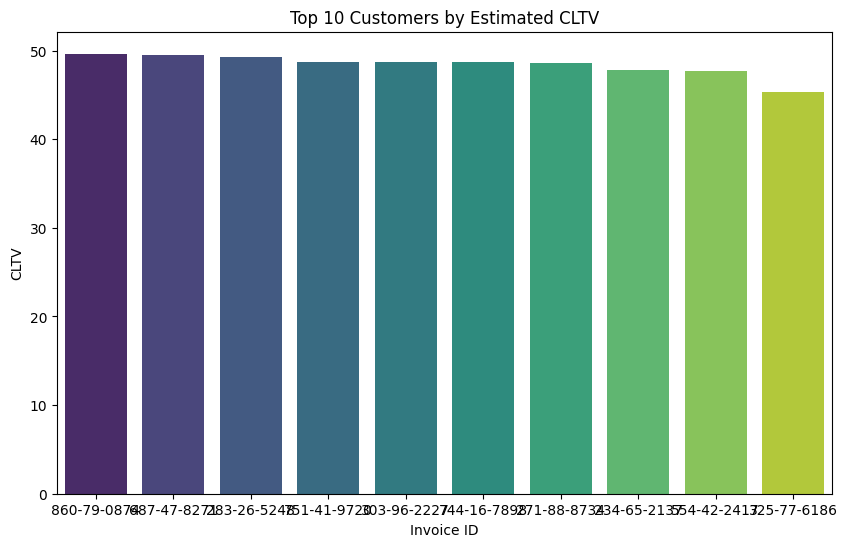

In [ ]:
# Estimate CLTV based on average gross income and frequency
customer_cltv = data.groupby('Invoice ID').agg({
    'gross income': 'sum',
    'Quantity': 'sum',
    'Date': 'nunique'
}).reset_index()

# Assume a simple model: CLTV = Gross Income * Average Order Frequency
customer_cltv['Order_Frequency'] = customer_cltv['Date'] / customer_cltv['Date'].max()
customer_cltv['CLTV'] = customer_cltv['gross income'] * customer_cltv['Order_Frequency']

# Visualize top customers by CLTV
top_customers_cltv = customer_cltv.sort_values(by='CLTV', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Invoice ID', y='CLTV', data=top_customers_cltv, palette='viridis')
plt.title('Top 10 Customers by Estimated CLTV')
plt.show()


##Churn Prediction

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Convert Date column to datetime format if not already done
data['Date'] = pd.to_datetime(data['Date'])

# Define churn as customers who haven't made a purchase in the last 30 days
latest_date = data['Date'].max()
data['Days_Since_Last_Purchase'] = data.groupby('Invoice ID')['Date'].transform(lambda x: (latest_date - x.max()).days)
data['Churn'] = (data['Days_Since_Last_Purchase'] > 30).astype(int)

# Encode the data again to include the new 'Churn' column
data_encoded = data.copy()
label_encoders = {}
for column in data_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])
    label_encoders[column] = le

# Now drop unnecessary columns for the churn model
X_churn = data_encoded.drop(columns=['Churn', 'gross income', 'Invoice ID', 'Date', 'Time'])
y_churn = data_encoded['Churn']

# Split the dataset into training and testing sets
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(X_churn, y_churn, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_churn_model = RandomForestClassifier(random_state=42)
rf_churn_model.fit(X_train_churn, y_train_churn)
y_pred_churn = rf_churn_model.predict(X_test_churn)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Churn Prediction Accuracy: {accuracy_score(y_test_churn, y_pred_churn):.2f}")
print(confusion_matrix(y_test_churn, y_pred_churn))
print(classification_report(y_test_churn, y_pred_churn))



Churn Prediction Accuracy: 1.00
[[108   0]
 [  0 192]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       192

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
# Check data types in X_train_churn
print(X_train_churn.dtypes)

# If you identify any 'Period' data type, convert it or drop it (assuming we found one in 'Days_Since_Last_Purchase')
X_churn['Days_Since_Last_Purchase'] = X_churn['Days_Since_Last_Purchase'].astype(int)

# Check if there are any non-numeric columns
non_numeric_columns = X_churn.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_columns) > 0:
    print("Non-numeric columns detected:", non_numeric_columns)

# Drop non-numeric columns or convert them appropriately
# In this example, let's assume we don't have non-numeric columns left

# Split the dataset into training and testing sets
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(X_churn, y_churn, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_churn_model = RandomForestClassifier(random_state=42)
rf_churn_model.fit(X_train_churn, y_train_churn)
y_pred_churn = rf_churn_model.predict(X_test_churn)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"Churn Prediction Accuracy: {accuracy_score(y_test_churn, y_pred_churn):.2f}")
print(confusion_matrix(y_test_churn, y_pred_churn))
print(classification_report(y_test_churn, y_pred_churn))


Branch                        int64
City                          int64
Customer type                 int64
Gender                        int64
Product line                  int64
Unit price                  float64
Quantity                      int64
Tax 5%                      float64
Total                       float64
Payment                       int64
cogs                        float64
gross margin percentage     float64
Rating                      float64
Days_Since_Last_Purchase      int64
dtype: object
Churn Prediction Accuracy: 1.00
[[108   0]
 [  0 192]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       192

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



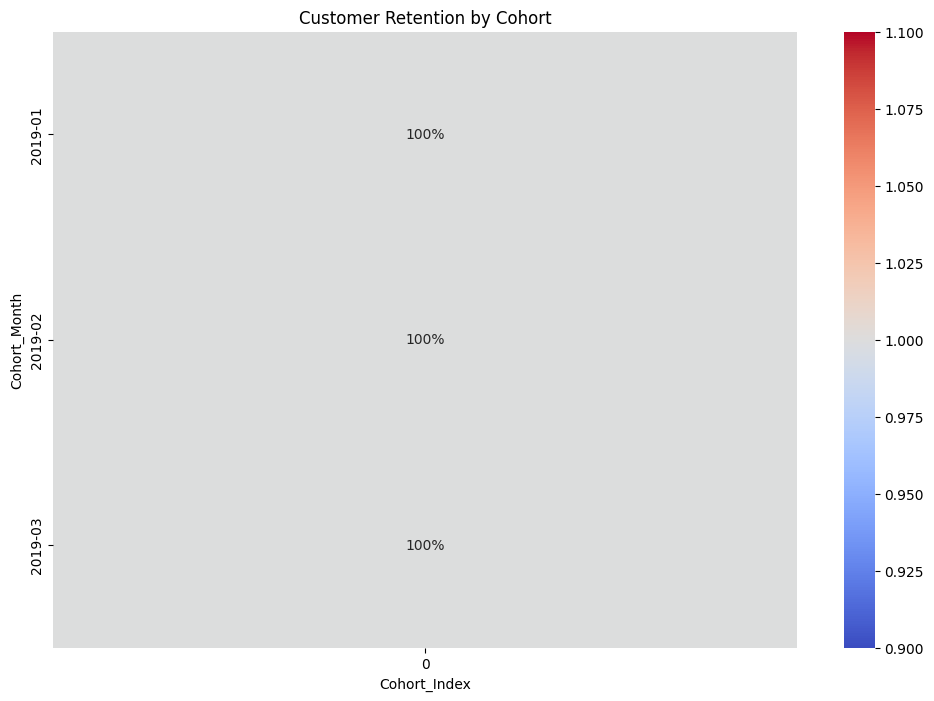

In [ ]:
from datetime import datetime
from operator import attrgetter


# Cohort Analysis by Month of First Purchase
data['Order_Month'] = data['Date'].dt.to_period('M')
data['Cohort_Month'] = data.groupby('Invoice ID')['Date'].transform('min').dt.to_period('M')

# Group by Cohort Month and Order Month, and calculate unique customers
cohort_data = data.groupby(['Cohort_Month', 'Order_Month']).agg({
    'Invoice ID': pd.Series.nunique,
    'gross income': 'sum'
}).reset_index()

cohort_data.rename(columns={'Invoice ID': 'Total Customers'}, inplace=True)

# Calculate the period number for each cohort
cohort_data['Cohort_Index'] = (cohort_data['Order_Month'] - cohort_data['Cohort_Month']).apply(attrgetter('n'))

# Pivot the data to get cohort sizes in a matrix
cohort_pivot = cohort_data.pivot_table(index='Cohort_Month', columns='Cohort_Index', values='Total Customers')

# Retention Rate
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# Visualize the retention rate
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='coolwarm')
plt.title('Customer Retention by Cohort')
plt.show()


 ## Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the Random Forest model
cv_scores = cross_val_score(rf_churn_model, X_churn, y_churn, cv=5, scoring='accuracy')

# Print the cross-validation scores and the mean score
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.00


##Feature Importance

                     Feature  Importance
13  Days_Since_Last_Purchase    0.831709
12                    Rating    0.026291
5                 Unit price    0.024739
10                      cogs    0.024599
8                      Total    0.022836
7                     Tax 5%    0.019832
6                   Quantity    0.012749
4               Product line    0.010962
9                    Payment    0.008206
0                     Branch    0.005348
2              Customer type    0.004635
1                       City    0.004319
3                     Gender    0.003774
11   gross margin percentage    0.000000


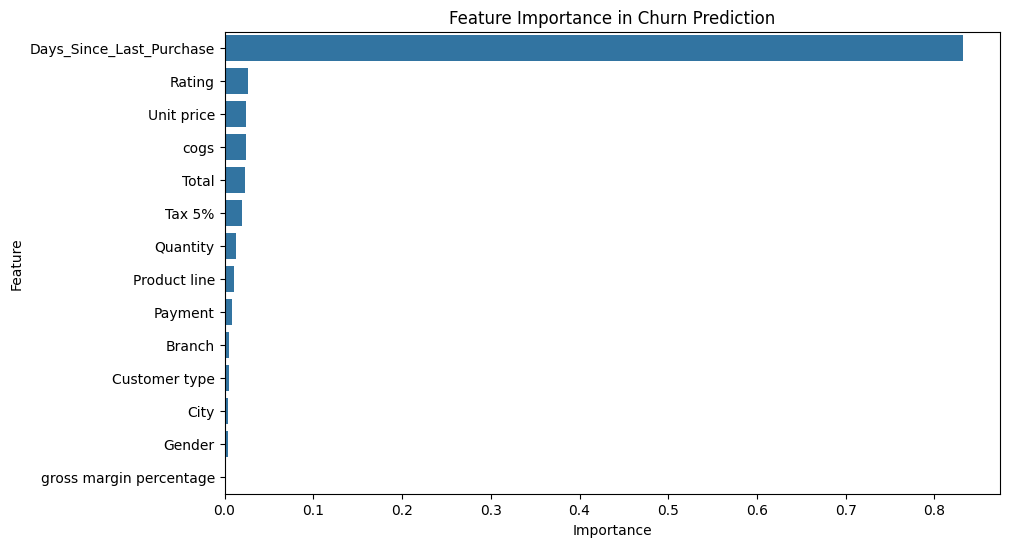

In [ ]:
# Get feature importances from the Random Forest model
importances = rf_churn_model.feature_importances_
feature_names = X_churn.columns

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Visualize the feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Churn Prediction')
plt.show()


##Model Interpretability

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 33.9 MB/s eta 0:00:00


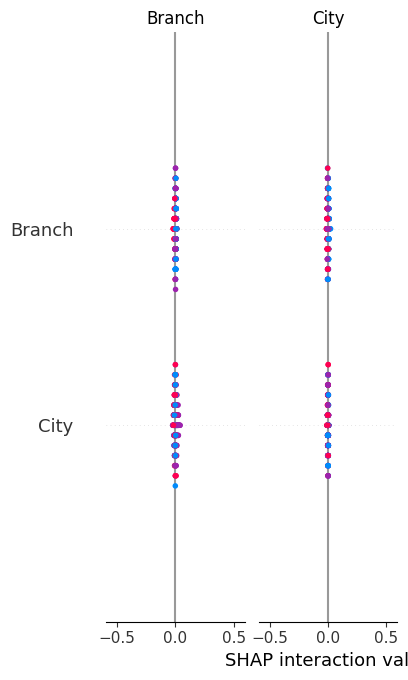

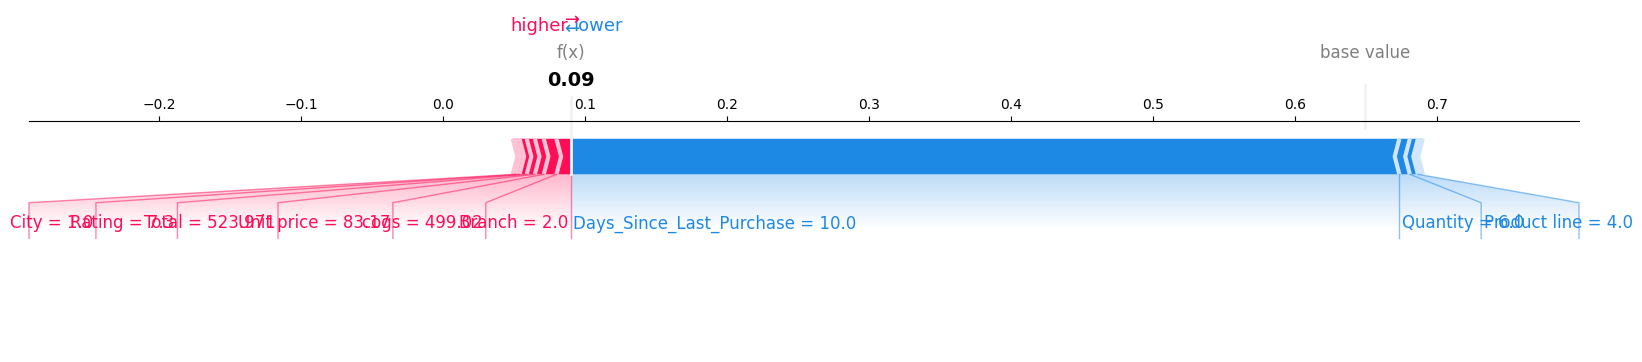

In [ ]:
import shap
shap.initjs()
import matplotlib.pyplot as plt

# Initialize the SHAP explainer with the Random Forest model
explainer = shap.TreeExplainer(rf_churn_model)
shap_values = explainer.shap_values(X_test_churn)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test_churn)

# Force plot for the first prediction (detailed explanation for a single prediction)
shap.force_plot(explainer.expected_value[1], shap_values[0,:,1], X_test_churn.iloc[0,:],
                show=False, matplotlib=True)
plt.savefig('force_plot.png')


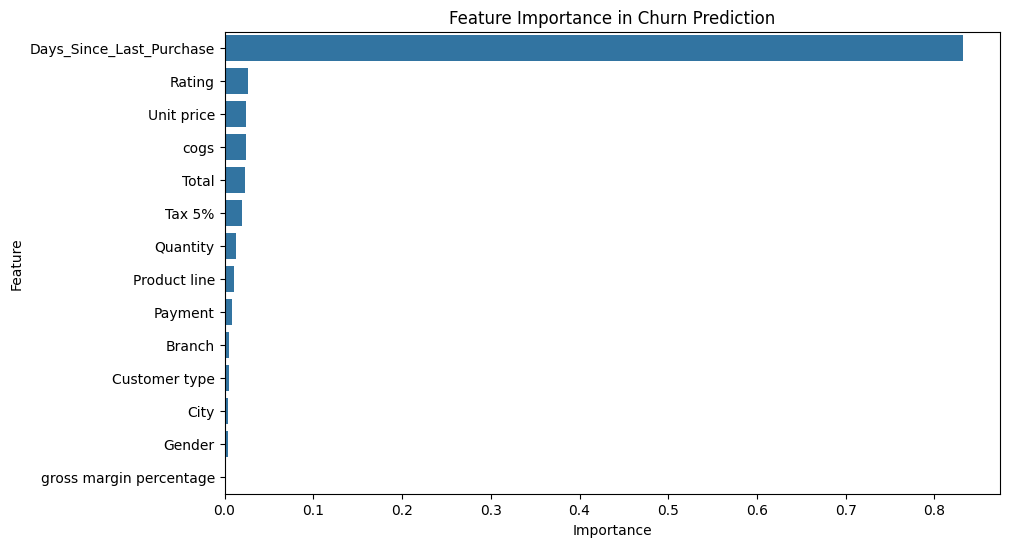

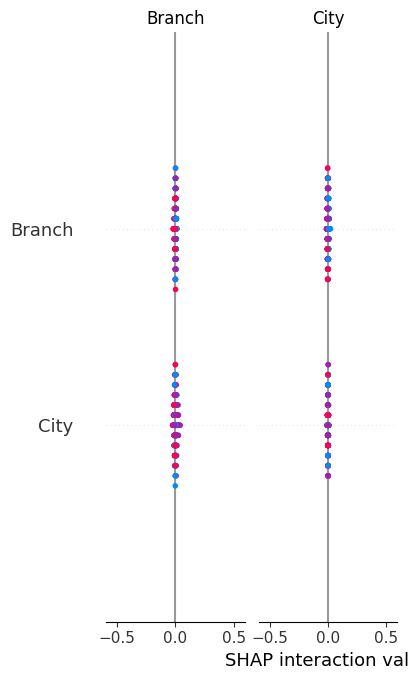

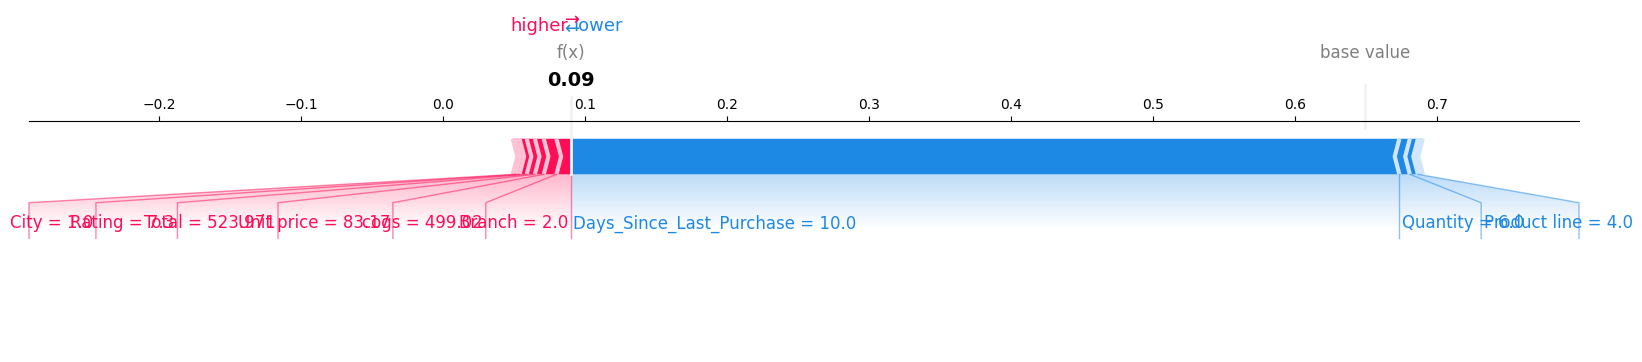

(array([1., 1., 1., 1., 1.]),
 1.0,
                      Feature  Importance
 13  Days_Since_Last_Purchase    0.831709
 12                    Rating    0.026291
 5                 Unit price    0.024739
 10                      cogs    0.024599
 8                      Total    0.022836
 7                     Tax 5%    0.019832
 6                   Quantity    0.012749
 4               Product line    0.010962
 9                    Payment    0.008206
 0                     Branch    0.005348
 2              Customer type    0.004635
 1                       City    0.004319
 3                     Gender    0.003774
 11   gross margin percentage    0.000000)

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# 1. Cross-Validation
# Perform 5-fold cross-validation on the Random Forest model
cv_scores = cross_val_score(rf_churn_model, X_churn, y_churn, cv=5, scoring='accuracy')
cv_mean_score = cv_scores.mean()

# 2. Feature Importance
# Get feature importances from the Random Forest model
importances = rf_churn_model.feature_importances_
feature_names = X_churn.columns

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 3. SHAP Analysis
# Initialize the SHAP explainer with the Random Forest model
explainer = shap.TreeExplainer(rf_churn_model)
shap_values = explainer.shap_values(X_test_churn)

# Visualize feature importance using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Churn Prediction')
plt.show()

# SHAP summary plot
shap.summary_plot(shap_values, X_test_churn)

# SHAP force plot for the first prediction
shap.force_plot(explainer.expected_value[1], shap_values[0,:,1], X_test_churn.iloc[0,:], matplotlib=True)

cv_scores, cv_mean_score, feature_importance_df


##Business Insights

##Profitability Segmentation:

In [ ]:
# Define Recency, Frequency, and Monetary values using 'Invoice ID' and 'Customer type'
rfm = data.groupby(['Invoice ID', 'Customer type']).agg({
    'Date': lambda x: (data['Date'].max() - x.max()).days,
    'Invoice ID': 'count',
    'Total': 'sum'
}).rename(columns={'Invoice ID': 'Frequency', 'Total': 'Monetary'})

# Rename the Date column to Recency
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Reset the index if needed
rfm = rfm.reset_index()

# Segment customers based on RFM values (you can define your own thresholds)
rfm['RFM_Score'] = rfm.rank(method='first').sum(axis=1)

# Display the RFM table
print(rfm.head())
rfm

    Invoice ID Customer type  Recency  Frequency  Monetary  RFM_Score
0  101-17-6199        Normal       17          1  336.5565     1300.0
1  101-81-4070        Member       72          1  131.9220     1096.0
2  102-06-2002        Member       10          1  132.5625      375.0
3  102-77-2261        Member       25          1  480.0285     1044.0
4  105-10-6182        Member       31          1   45.1080      426.0


,Invoice ID,Customer type,Recency,Frequency,Monetary,RFM_Score
0,101-17-6199,Normal,17,1,336.5565,1300.0
1,101-81-4070,Member,72,1,131.9220,1096.0
2,102-06-2002,Member,10,1,132.5625,375.0
3,102-77-2261,Member,25,1,480.0285,1044.0
4,105-10-6182,Member,31,1,45.1080,426.0
...,...,...,...,...,...,...
995,894-41-5205,Normal,70,1,362.7120,4448.0
996,895-03-6665,Normal,42,1,345.0195,4087.0
997,895-66-0685,Member,25,1,56.9520,2872.0
998,896-34-0956,Normal,63,1,22.3860,3740.0


##Price Sensitivity Analysis

In [ ]:
# Calculate Price Elasticity of Demand for each product line
elasticity = data.groupby('Product line').apply(lambda x: (x['Quantity'].pct_change() / x['Unit price'].pct_change()).mean())
elasticity = elasticity.rename('Price Elasticity')
elasticity

,Price Elasticity
Product line,
Electronic accessories,-1.313064
Fashion accessories,-2.044034
Food and beverages,-0.414462
Health and beauty,-3.694423
Home and lifestyle,22.553556
Sports and travel,-1.335850


 ## Customer Lifetime Value (CLTV) Prediction

In [ ]:
# Assuming a hypothetical churn rate, for example, 0.2 (20%)
churn_rate = 0.2

# Estimate Customer Lifetime Value
cltv = (rfm['Monetary'] / rfm['Frequency']) * rfm['Frequency'] * (1 - churn_rate)
cltv = cltv.rename('CLTV')

# Segment customers based on CLTV
rfm['CLTV_Segment'] = pd.qcut(cltv, 4, labels=['Low', 'Medium', 'High', 'Very High'])

rfm

,Invoice ID,Customer type,Recency,Frequency,Monetary,RFM_Score,CLTV_Segment
0,101-17-6199,Normal,17,1,336.5565,1300.0,High
1,101-81-4070,Member,72,1,131.9220,1096.0,Medium
2,102-06-2002,Member,10,1,132.5625,375.0,Medium
3,102-77-2261,Member,25,1,480.0285,1044.0,Very High
4,105-10-6182,Member,31,1,45.1080,426.0,Low
...,...,...,...,...,...,...,...
995,894-41-5205,Normal,70,1,362.7120,4448.0,High
996,895-03-6665,Normal,42,1,345.0195,4087.0,High
997,895-66-0685,Member,25,1,56.9520,2872.0,Low
998,896-34-0956,Normal,63,1,22.3860,3740.0,Low


##Market Basket Analysis:

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Create a basket matrix
basket = data.groupby(['Invoice ID', 'Product line'])['Quantity'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Perform Apriori analysis
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
rules, frequent_itemsets

<ipython-input-44-47a3877d5c81>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


(Empty DataFrame
 Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
 Index: [],
    support                  itemsets
 0    0.170  (Electronic accessories)
 1    0.178     (Fashion accessories)
 2    0.174      (Food and beverages)
 3    0.152       (Health and beauty)
 4    0.160      (Home and lifestyle)
 5    0.166       (Sports and travel))

#Predictive Modeling for Sales Forecasting:

In [ ]:
# !pip install fbprophet==0.7.1
#One another method is by using prophet by meta
!pip install prophet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from prophet import Prophet

df_2=data.copy()
df_2['Date'] = pd.to_datetime(df_2['Date'])
df_2 = df_2[['Date', 'Total']].rename(columns={'Date': 'ds', 'Total': 'y'})
df_2 = df_2.groupby('ds').sum().reset_index()
# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(df_2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/holidays/__init__.py:32: FutureIncompatibilityWarning: 

This is a future version incompatibility warning from Python Holidays library v0.54
to inform you about an upcoming change in our API versioning strategy that may affect your
project's dependencies. Starting from version 1.0 onwards, we will be following a loose form of
Semantic Versioning (SemVer, https://semver.org) to provide clearer communication regarding any
potential breaking changes.

This means that while we strive to maintain backward compatibility, there might be occasional
updates that introduce breaking changes to our API. To ens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  

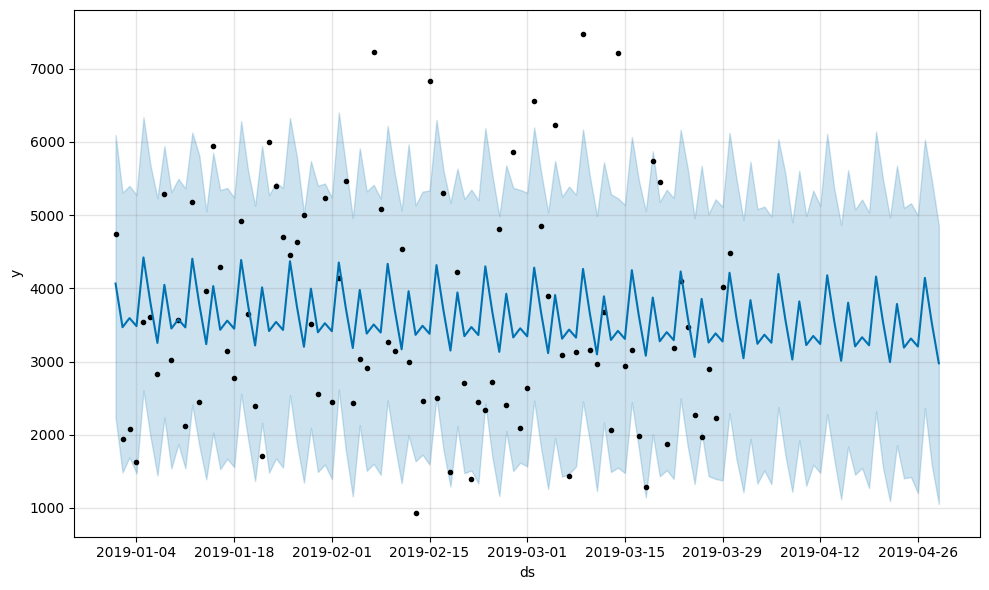

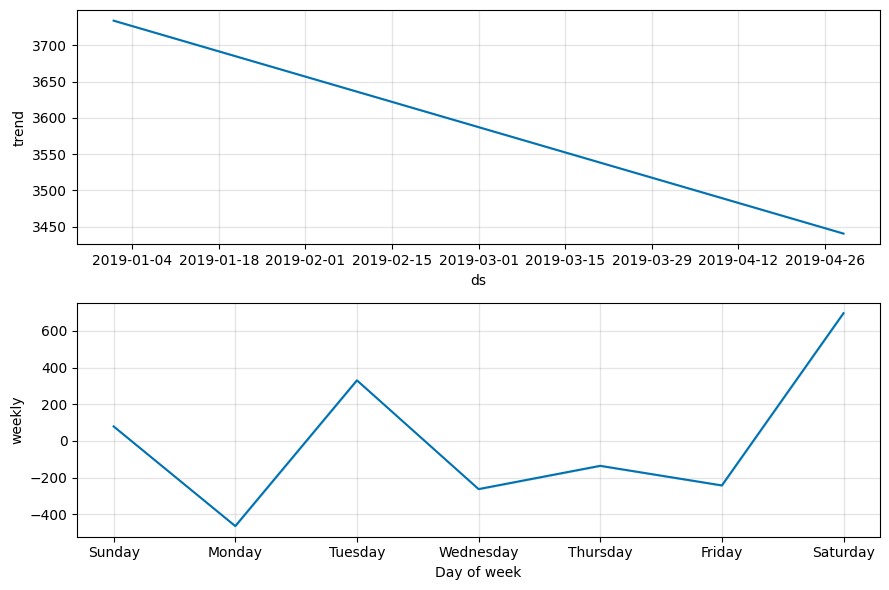

In [ ]:
#Creating future data
pred_new = model.make_future_dataframe(periods=30, freq='D')  #Next 45 days forecast
forecast = model.predict(pred_new)
# Plot the forecast
fig = model.plot(forecast)
fig_1 = model.plot_components(forecast)
plt.show()

##Gradient Boosting (e.g., XGBoost)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_churn, y_train_churn)

# Predict churn
y_pred_xgb = xgb_model.predict(X_test_churn)

# Evaluate the model
print("XGBoost Model Accuracy:", accuracy_score(y_test_churn, y_pred_xgb))
print(classification_report(y_test_churn, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


XGBoost Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       192

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



 ## K-Means Clustering

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


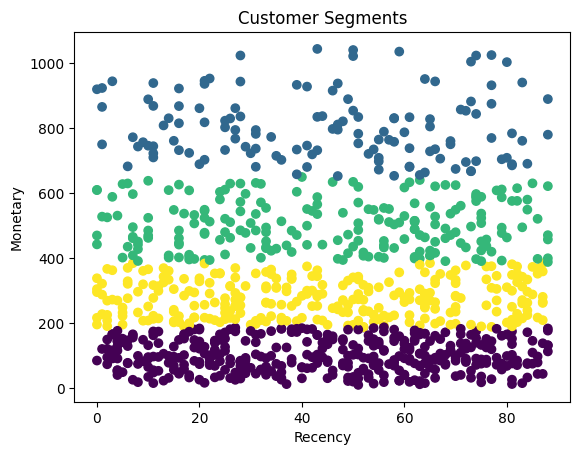

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the model
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]
kmeans.fit(rfm_features)

# Assign clusters
rfm['Cluster'] = kmeans.labels_

# Plot the clusters
plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Cluster'])
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Customer Segments')
plt.show()


##Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Define the model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train_churn, y_train_churn)

# Predict churn
y_pred_svm = svm_model.predict(X_test_churn)

# Evaluate the model
print("SVM Model Accuracy:", accuracy_score(y_test_churn, y_pred_svm))
print(classification_report(y_test_churn, y_pred_svm))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SVM Model Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.99      0.99      0.99       192

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



##Time Series Forecasting (ARIMA)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


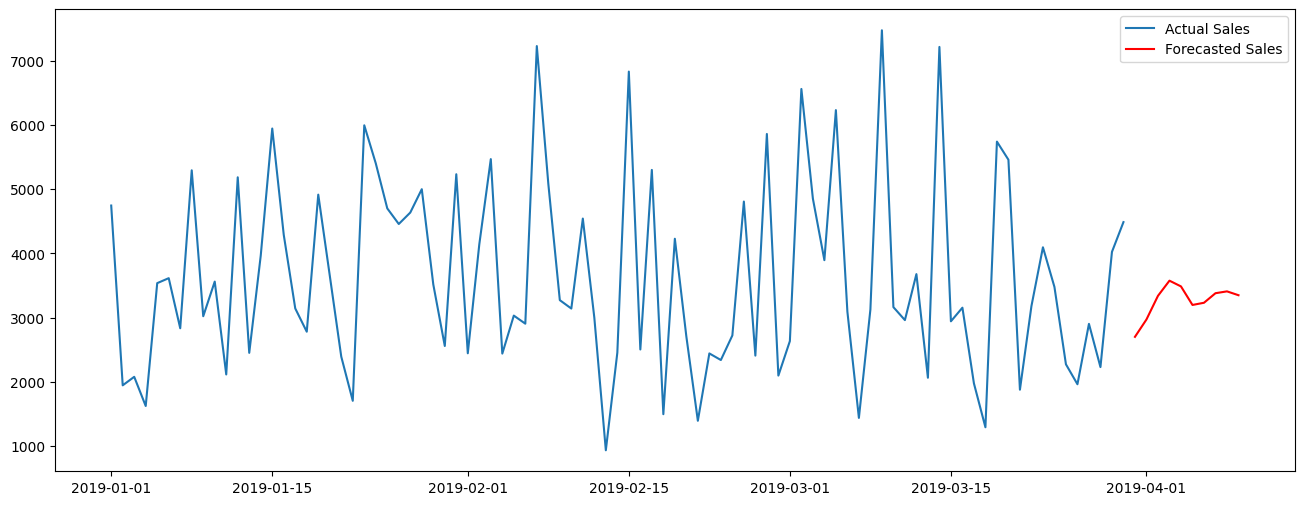

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# # Check all columns for Period dtype and convert to datetime if necessary
# for col in data.columns:
#     if data[col].dtype.name.startswith('period'):
#         data[col] = data[col].dt.to_timestamp()

# Aggregate sales data by date
sales_data = data.groupby('Date')['Total'].sum()

# Define the model
arima_model = ARIMA(sales_data, order=(5, 1, 0))

# Fit the model
arima_model_fit = arima_model.fit()

# Forecast the next 30 days
forecast = arima_model_fit.forecast(steps=10)

# Plot the forecast
plt.figure(figsize=(16, 6))
plt.plot(sales_data, label='Actual Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.legend()
plt.show()


##Neural Networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_churn.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_churn, y_train_churn, epochs=50, batch_size=10, verbose=1)

# Evaluate the model
scores = nn_model.evaluate(X_test_churn, y_test_churn)
print("Neural Network Accuracy:", scores[1])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6099 - loss: 7.1566
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8743 - loss: 0.2464
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8829 - loss: 0.3252
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9200 - loss: 0.1837
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9048 - loss: 0.2787
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9055 - loss: 0.3567
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9060 - loss: 0.3462
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9599 - loss: 0.1048
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9239 - loss: 0.1568
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8585 - loss: 0.6251
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9388 - loss: 0.1331
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9141 - lo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
https://community.fabric.microsoft.com/t5/Desktop/Data-Analytics-Study-Case-SuperMarket-Sales/m-p/4091872

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: invalid syntax (<ipython-input-53-635cd19c5fe9>, line 1)

In [ ]:
https://www.kaggle.com/datasets/armanmanteghi/supermarket-sales-insights-and-optimization

In [ ]:
https://github.com/sushantag9/Supermarket-Sales-Data-Analysis/blob/master/super-market-analysis.ipynb

In [ ]:
https://medium.com/@shreyareddy.edulakanti/analyzing-supermarket-sales-using-crisp-dm-94aa4bfc74d8

In [ ]:
https://medium.com/@sunnykinson_data/supermarket-sales-analysis-using-excel-dfafd8221830

In [ ]:
https://www.slideshare.net/slideshow/supermarketsalespptx/260558308